### **Customer Classification Model**

### **Problem Statement**

Company Introduction:

Your client for this project is a retail banking institution.

They are going to float a stock trading facility for their existing customers.
The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
They will have to incentivize their customers to adopt their offerings.
One way to incentivize is to offer discounts on the commission for trading transactions.

Current Scenario:

The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.

The current process suffers from the following problems:

One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

### **Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
# import sklearn.linear_model.LogisticRegression as LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings(action="ignore")

### **Import Dataset**

In [4]:
data=pd.read_csv("/content/drive/MyDrive/TermProjects/CustomerClassification/existing_base_train.csv")
dataTest=pd.read_csv("/content/drive/MyDrive/TermProjects/CustomerClassification/existing_base_test.csv")


data.head(10)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2
5,3309,Zero,45-50,Partner,Secretarial/Admin,Business Manager,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Northern Ireland,13.18,4.83,14.23,33.62,2
6,6610,Zero,36-40,Partner,Secretarial/Admin,Secretarial/Admin,Own Home,"<30,000, >=27,500",Yes,No,...,1.00,3.99,5.49,Female,West Midlands,2.00,23.48,21.90,13.12,2
7,10621,Zero,61-65,Partner,Retired,Retired,Own Home,"<20,000, >=17,500",No,No,...,0.00,0.00,0.00,Male,North West,0.00,4.99,4.99,15.74,2
8,2630,1,45-50,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,27.18,4.83,13.66,36.05,2
9,9356,3,36-40,Partner,Professional,Housewife,Own Home,"<27,500, >=25,000",Yes,No,...,24.47,0.00,0.00,Male,North West,0.00,6.74,6.74,8.60,2


### **Dataset Description**




In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

### **Check value "0" in column**

In [6]:
print((data["Portfolio_Balance"]<0).sum(), "\n")

852 



In [7]:
print((data==0).sum(), "\n")


REF_NO                                0
children                              0
age_band                              0
status                                0
occupation                            0
occupation_partner                    0
home_status                           0
family_income                         0
self_employed                         0
self_employed_partner                 0
year_last_moved                      69
TVarea                                0
post_code                             0
post_area                             0
Average_Credit_Card_Transaction    4989
Balance_Transfer                   3524
Term_Deposit                       4587
Life_Insurance                     2454
Medical_Insurance                  4046
Average_A/C_Balance                2806
Personal_Loan                      5134
Investment_in_Mutual_Fund          2602
Investment_Tax_Saving_Bond         5133
Home_Loan                          5609
Online_Purchase_Amount             5700


In [8]:
print((data=="Unknown").sum(), "\n")


REF_NO                                0
children                              0
age_band                             44
status                               40
occupation                          449
occupation_partner                 1942
home_status                           0
family_income                       108
self_employed                         0
self_employed_partner                 0
year_last_moved                       0
TVarea                              154
post_code                             0
post_area                             0
Average_Credit_Card_Transaction       0
Balance_Transfer                      0
Term_Deposit                          0
Life_Insurance                        0
Medical_Insurance                     0
Average_A/C_Balance                   0
Personal_Loan                         0
Investment_in_Mutual_Fund             0
Investment_Tax_Saving_Bond            0
Home_Loan                             0
Online_Purchase_Amount                0


In [9]:
from sklearn.impute import KNNImputer
data.describe()
# # Replace '0' values with 'nan'
# data1= data[data=="Unknown"]
# values = data1.values
# print(values)
# # Count the number of NaN values in each column
# print('Missing: %d' % ((data=="Unknown").sum()).sum())
# knnImputer=KNNImputer(n_neighbors=5)
# # Transform the dataset
# transformed_values = knnImputer.fit_transform(values)
# # Count the number of NaN values in each column
# print('Missing: %d' % ((data=="Unknown").sum()).sum())
# data=pd.DataFrame(transformed_values,columns=data.columns)

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [10]:
data.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


### **Detect Outliers and distribution of features**

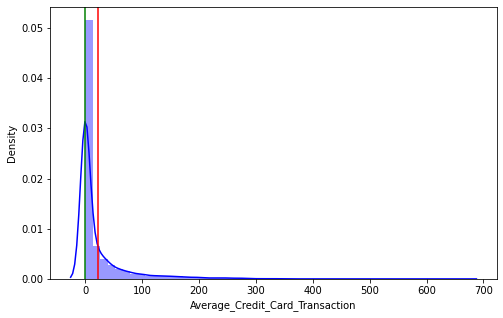

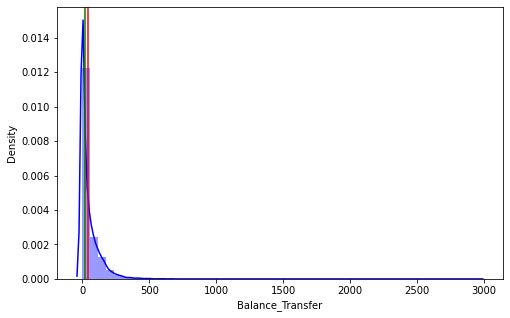

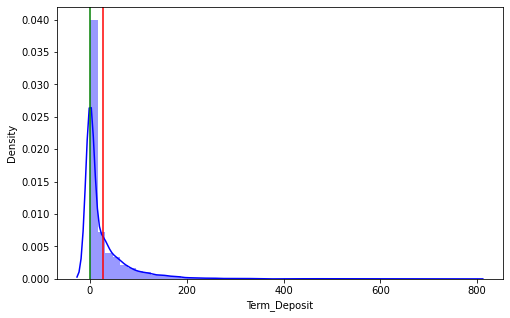

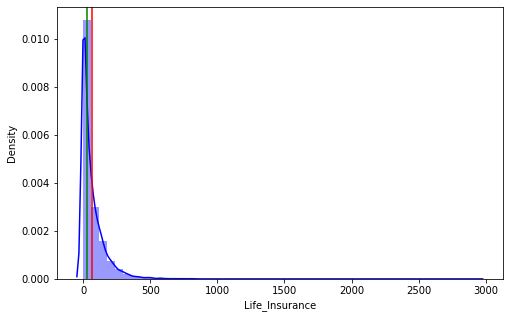

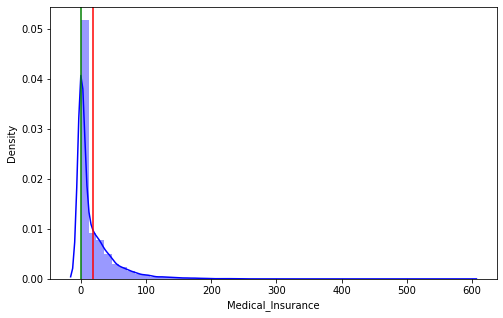

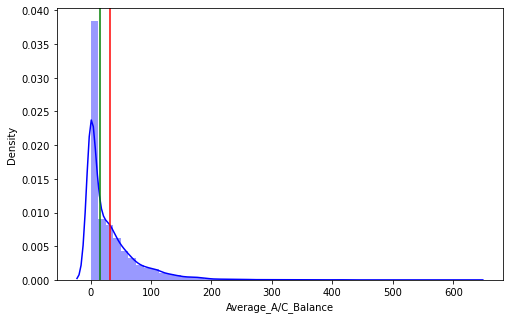

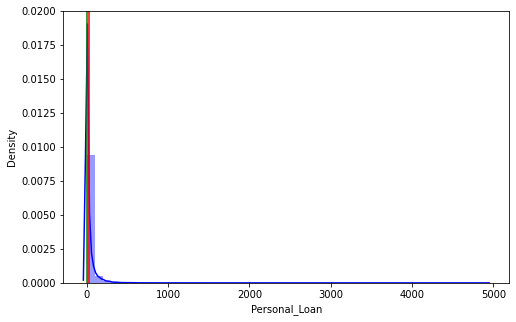

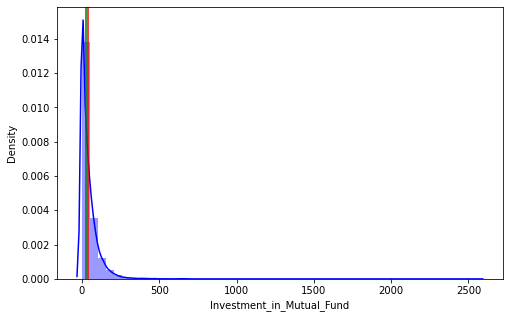

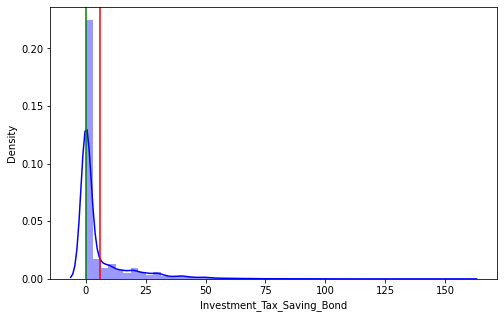

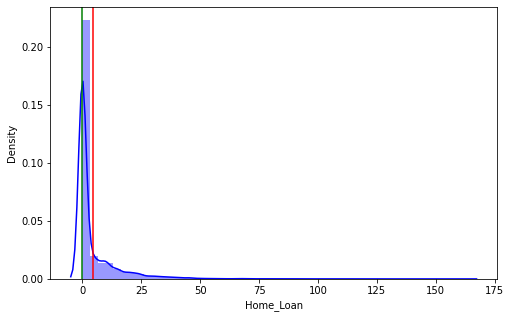

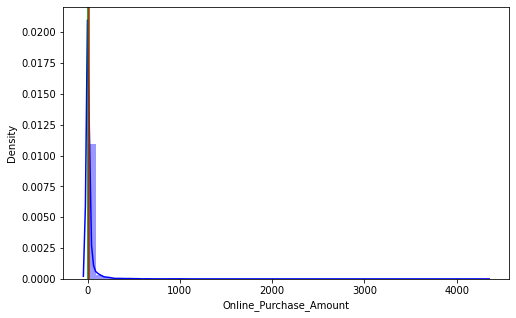

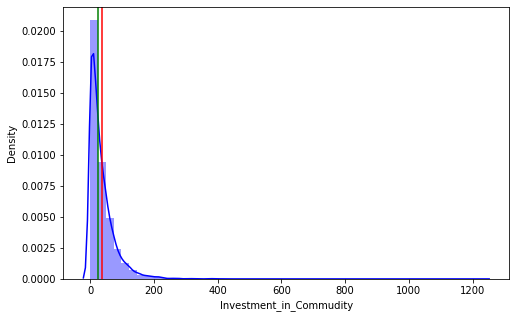

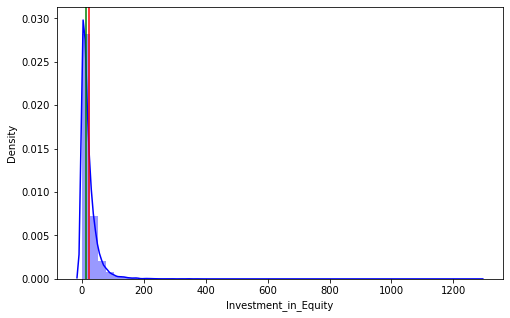

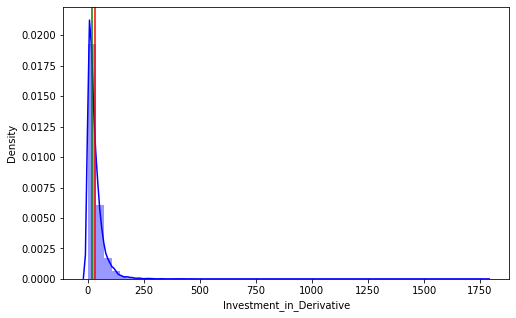

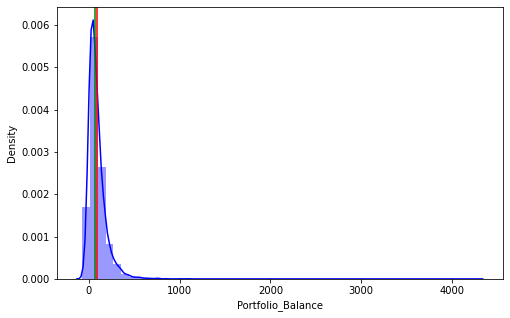

In [11]:
Contcolumn=["Average_Credit_Card_Transaction","Balance_Transfer","Term_Deposit","Life_Insurance","Medical_Insurance","Average_A/C_Balance","Personal_Loan",
            "Investment_in_Mutual_Fund","Investment_Tax_Saving_Bond","Home_Loan","Online_Purchase_Amount","Investment_in_Commudity","Investment_in_Equity",
            "Investment_in_Derivative","Portfolio_Balance"]
for col in Contcolumn:
  fig=plt.figure(figsize=[8,5])
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")



## **Feature Engineering**

In [12]:
data["TotalInvestment"]=data["Term_Deposit"]+data["Investment_in_Mutual_Fund"]+data["Investment_Tax_Saving_Bond"]+data["Investment_in_Commudity"]+data["Investment_in_Equity"]
+data["Investment_in_Derivative"]
data["TotalLoan"]=data["Personal_Loan"]+data["Home_Loan"]

dataTest["TotalInvestment"]=dataTest["Term_Deposit"]+dataTest["Investment_in_Mutual_Fund"]+dataTest["Investment_Tax_Saving_Bond"]+dataTest["Investment_in_Commudity"]+dataTest["Investment_in_Equity"]
+dataTest["Investment_in_Derivative"]
dataTest["TotalLoan"]=dataTest["Personal_Loan"]+dataTest["Home_Loan"]
data.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid,TotalInvestment,TotalLoan
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,7.68,Female,North West,151.55,81.79,136.02,360.37,2,688.92,230.87
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,18.99,Female,North West,44.28,13.91,29.23,89.22,2,58.19,15.99
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,Female,South West,8.58,1.75,4.82,14.50,2,20.79,0.02
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2,15.00,0.00
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2,11.64,0.00


## **EDA**

### **Check the distribution of different features**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

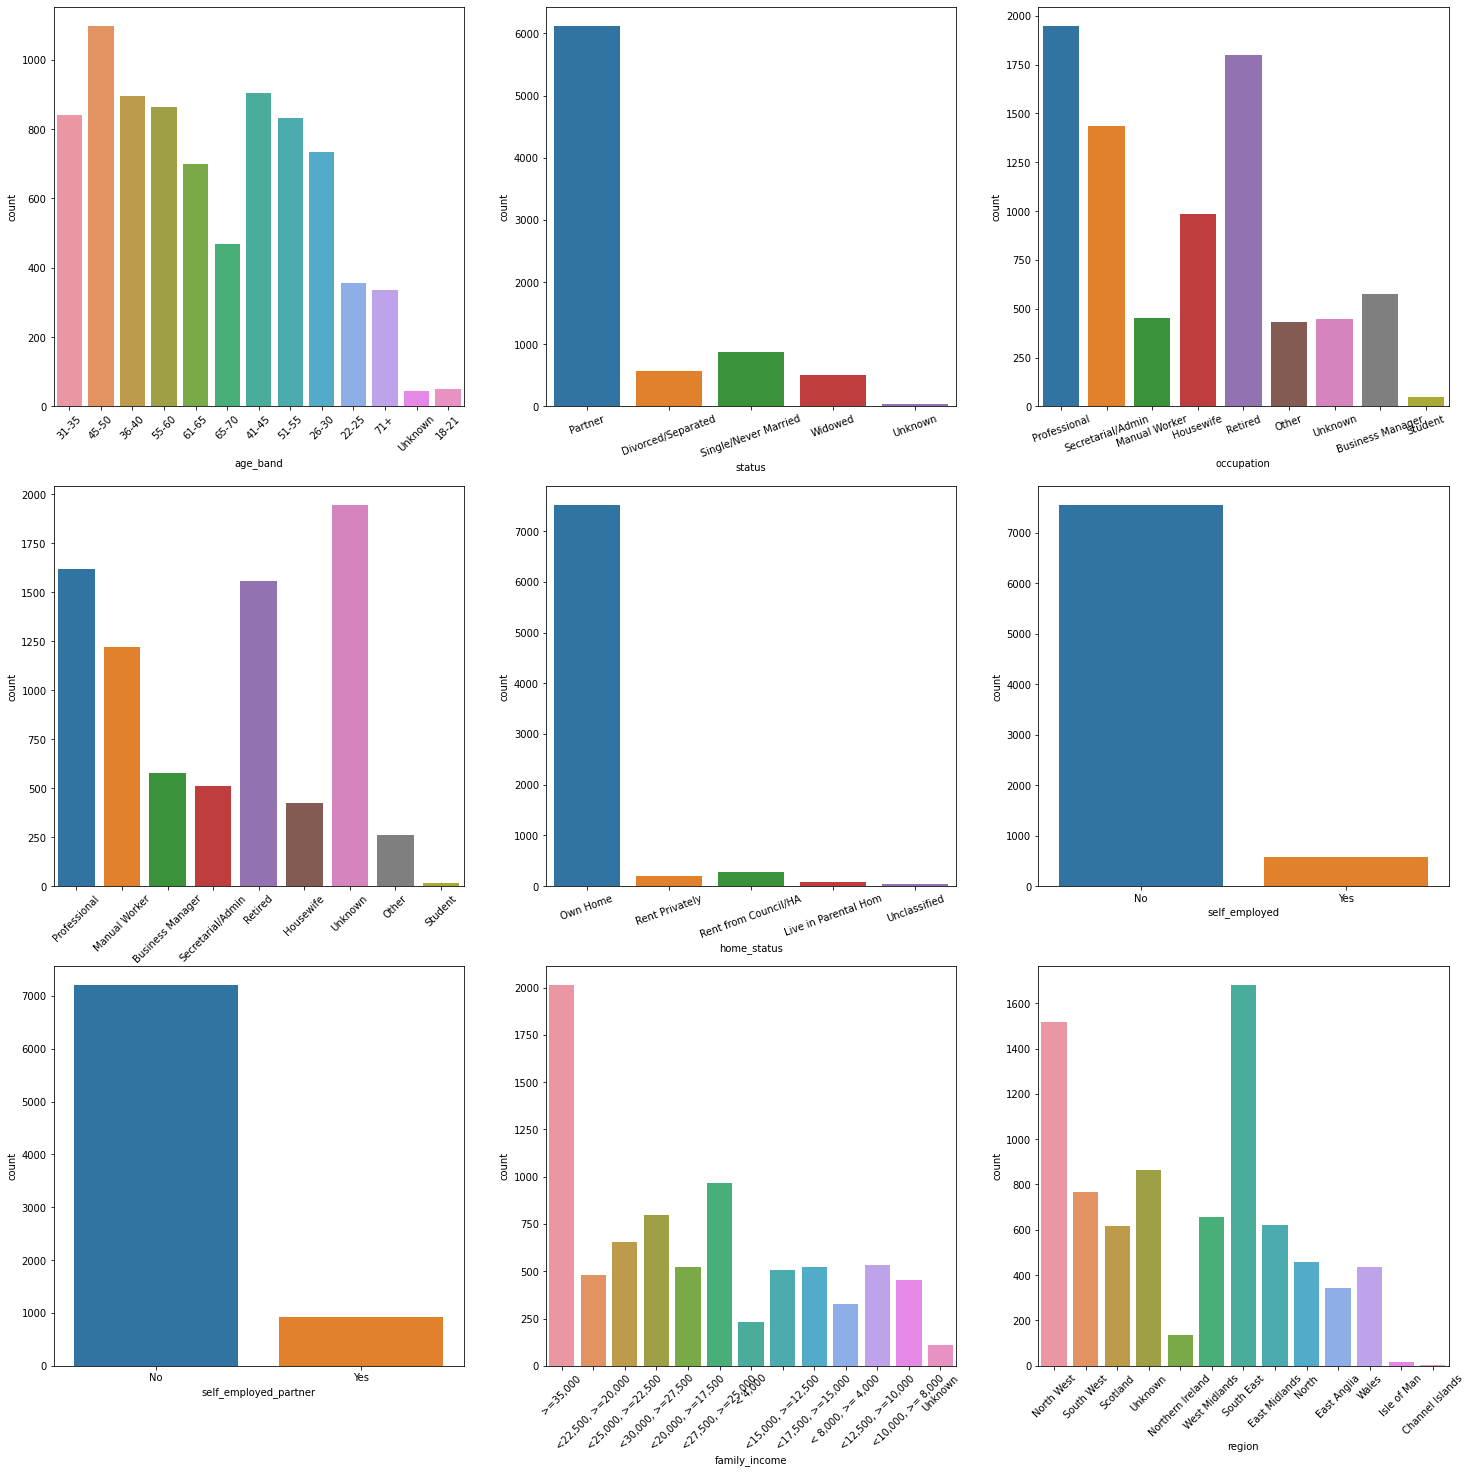

In [13]:
fig=plt.figure(figsize=[25,25])
plt.subplot(3,3,1)
sns.countplot(x="age_band",data=data)
plt.xticks(rotation=45)
plt.subplot(3,3,2)
sns.countplot(x="status",data=data)
plt.xticks(rotation=20)
plt.subplot(3,3,3)
sns.countplot(x="occupation",data=data)
plt.xticks(rotation=20)
plt.subplot(3,3,4)
sns.countplot(x="occupation_partner",data=data)
plt.xticks(rotation=45)
plt.subplot(3,3,5)
sns.countplot(x="home_status",data=data)
plt.xticks(rotation=20)
plt.subplot(3,3,6)
sns.countplot(x="self_employed",data=data)
plt.subplot(3,3,7)
sns.countplot(x="self_employed_partner",data=data)
plt.subplot(3,3,8)
sns.countplot(x="family_income",data=data)
plt.xticks(rotation=45)
plt.subplot(3,3,9)
sns.countplot(x="region",data=data)
plt.xticks(rotation=45)

# sns.countplot(x="gender",data=data)
# plt.xticks(rotation=45)
# plt.show()



## **Analyzing parameters of High worth Customer (Revenue_Grid=1)**

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

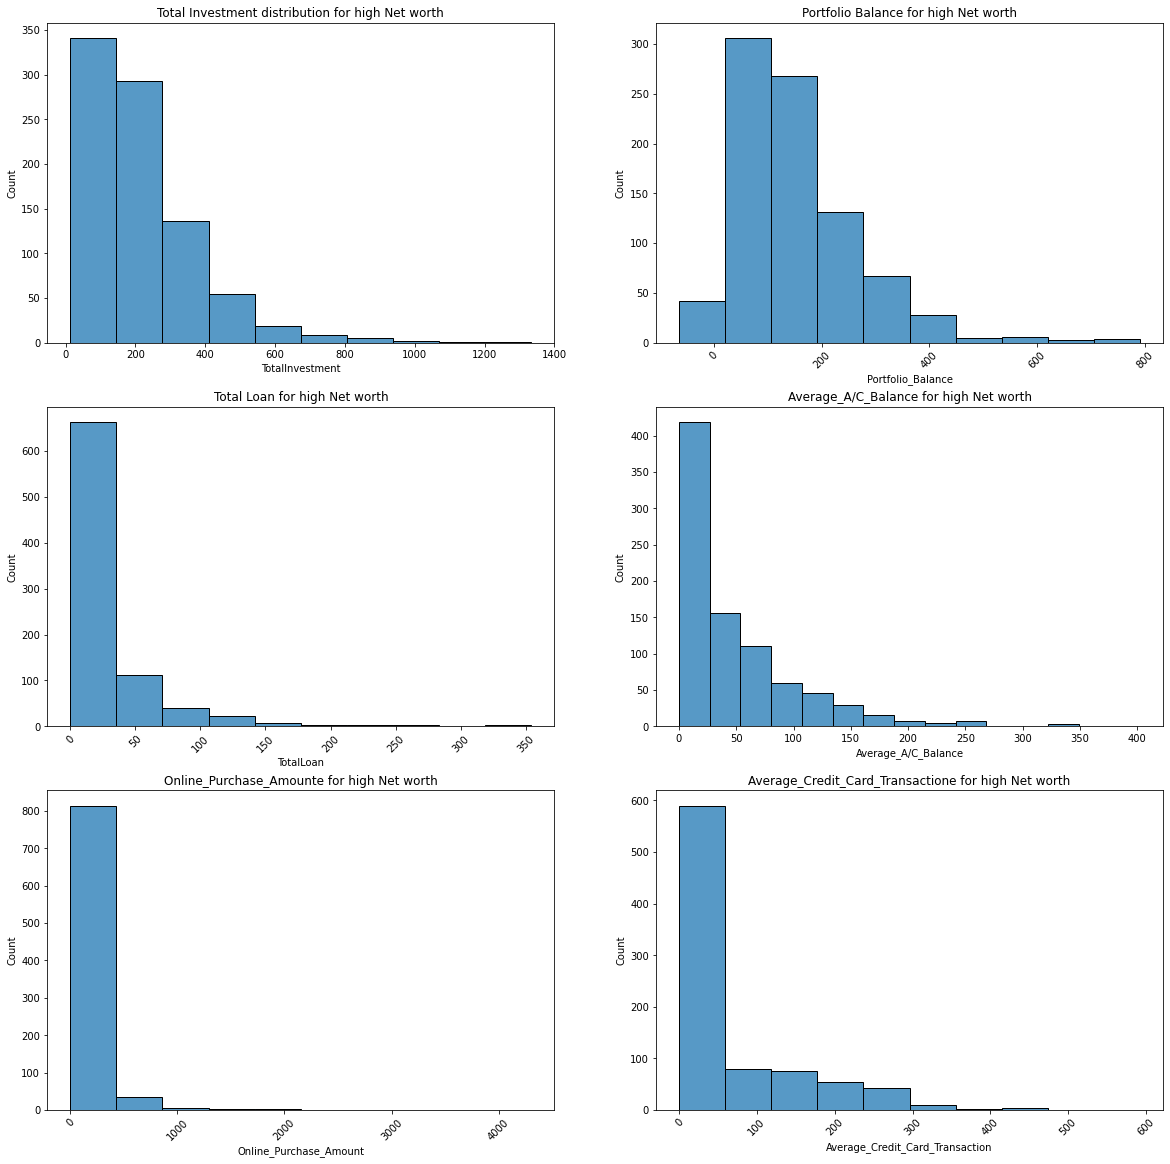

In [14]:
fig=plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
sns.histplot(x="TotalInvestment",bins=10, data=data[data.Revenue_Grid==1])
plt.title("Total Investment distribution for high Net worth")

plt.subplot(3,2,2)
sns.histplot(x="Portfolio_Balance",bins=10, data=data[data.Revenue_Grid==1])
plt.title("Portfolio Balance for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,3)
sns.histplot(x="TotalLoan",bins=10, data=data[data.Revenue_Grid==1])
plt.title("Total Loan for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,4)
sns.histplot(x="Average_A/C_Balance",bins=15, data=data[data.Revenue_Grid==1])
plt.title("Average_A/C_Balance for high Net worth")

plt.subplot(3,2,5)
sns.histplot(x="Online_Purchase_Amount",bins=10, data=data[data.Revenue_Grid==1])
plt.title("Online_Purchase_Amounte for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,6)
sns.histplot(x="Average_Credit_Card_Transaction",bins=10, data=data[data.Revenue_Grid==1])
plt.title("Average_Credit_Card_Transactione for high Net worth")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Avg Investment Gender Wise')

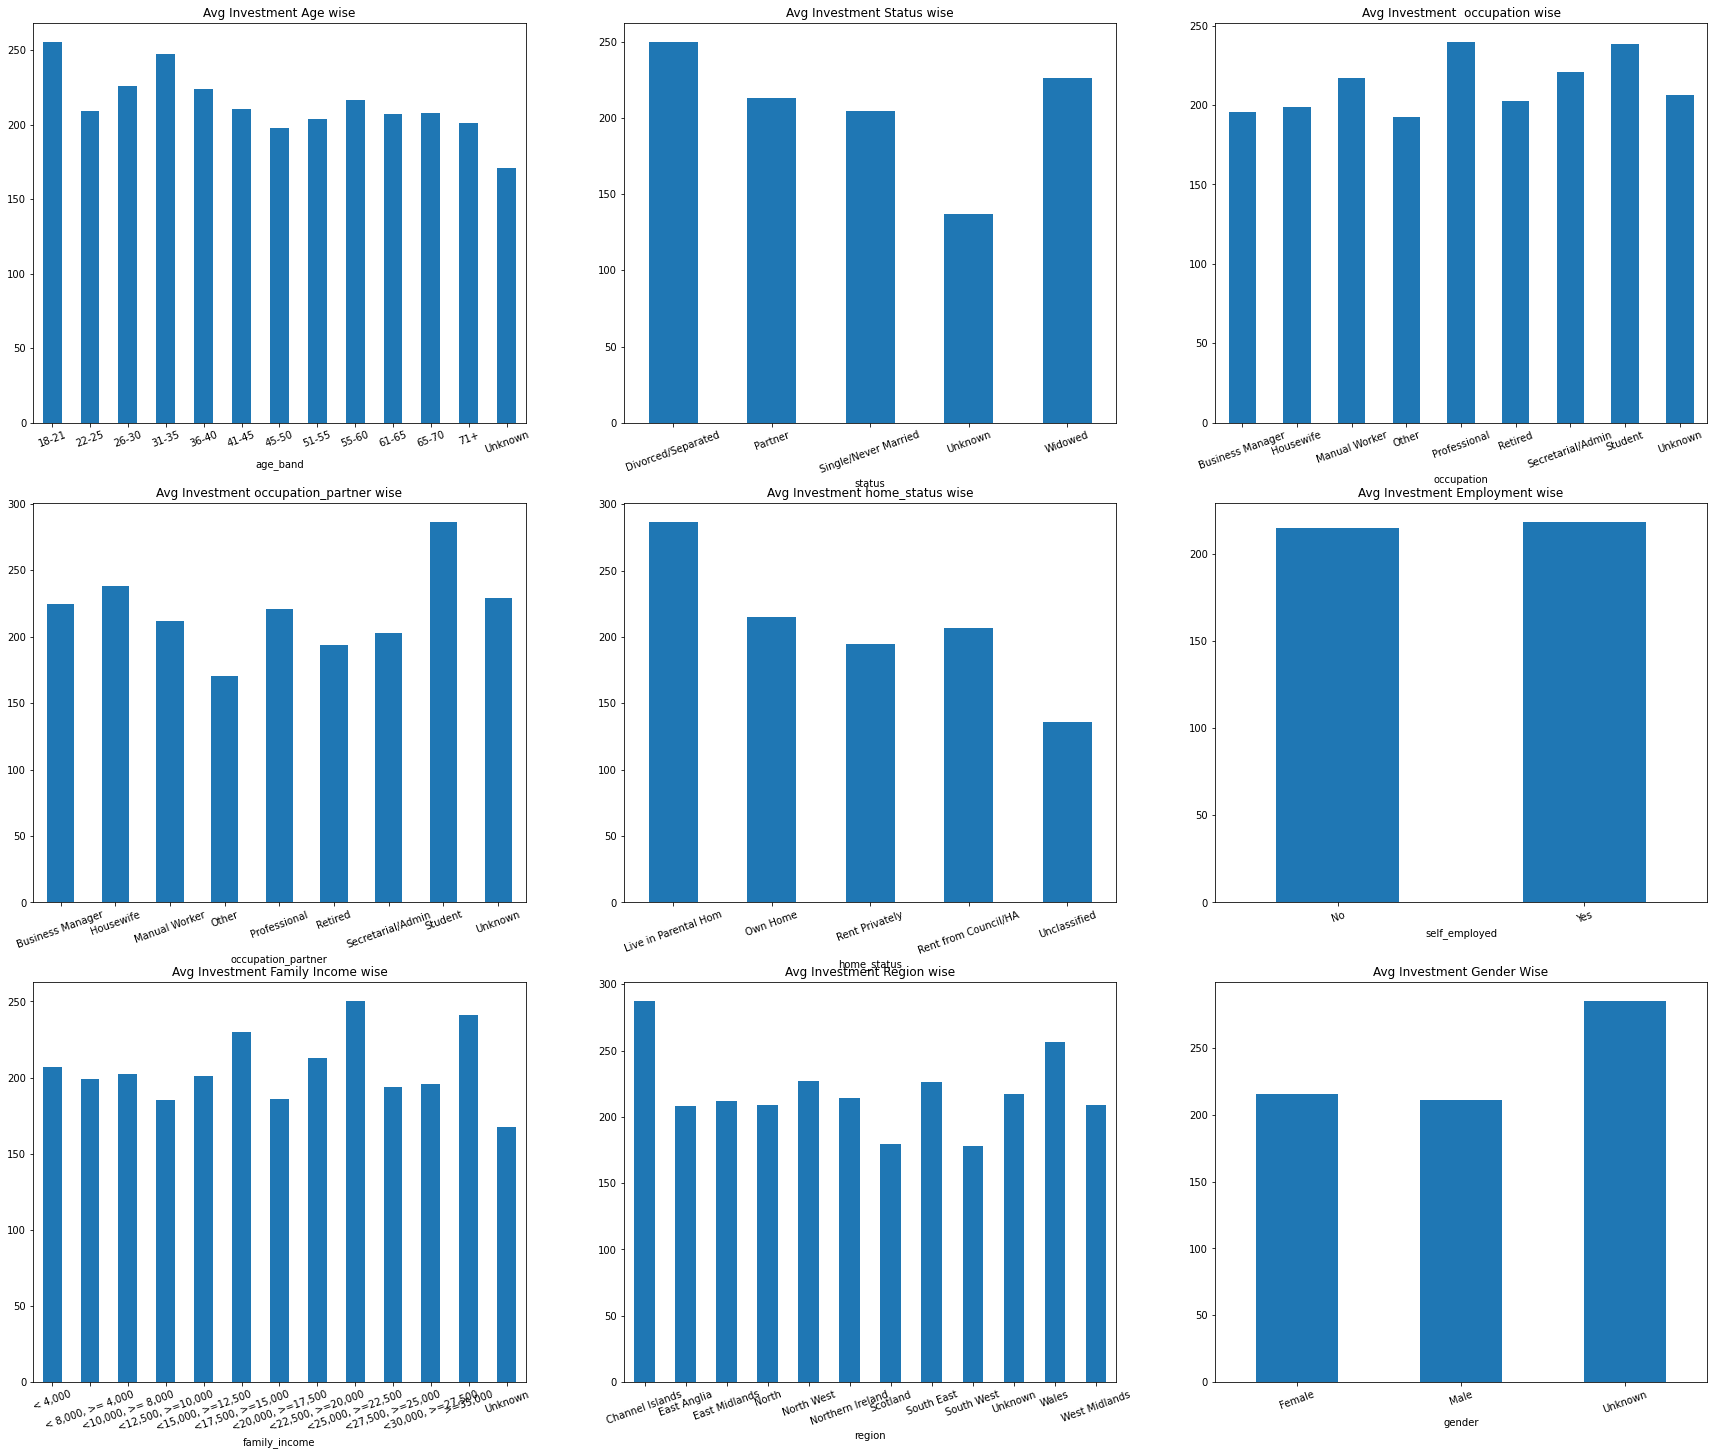

In [15]:
fig=plt.figure(figsize=[30,25])

plt.subplot(3,3,1)
data[data.Revenue_Grid==1].groupby("age_band")["TotalInvestment"].mean().plot.bar()
plt.title("Avg Investment Age wise")
plt.xticks(rotation=20)

plt.subplot(3,3,2)
data[data.Revenue_Grid==1].groupby("status")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Status wise")

plt.subplot(3,3,3)
data[data.Revenue_Grid==1].groupby("occupation")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment  occupation wise")

plt.subplot(3,3,4)
data[data.Revenue_Grid==1].groupby("occupation_partner")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment occupation_partner wise")

plt.subplot(3,3,5)
data[data.Revenue_Grid==1].groupby("home_status")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment home_status wise")

plt.subplot(3,3,6)
data[data.Revenue_Grid==1].groupby("self_employed")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Employment wise")

plt.subplot(3,3,7)
data[data.Revenue_Grid==1].groupby("family_income")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Family Income wise")

plt.subplot(3,3,8)
data[data.Revenue_Grid==1].groupby("region")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Region wise")

plt.subplot(3,3,9)
data[data.Revenue_Grid==1].groupby("gender")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Gender Wise")

## **Analyzing parameters of Low worth Customer (Revenue_Grid=2)**

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

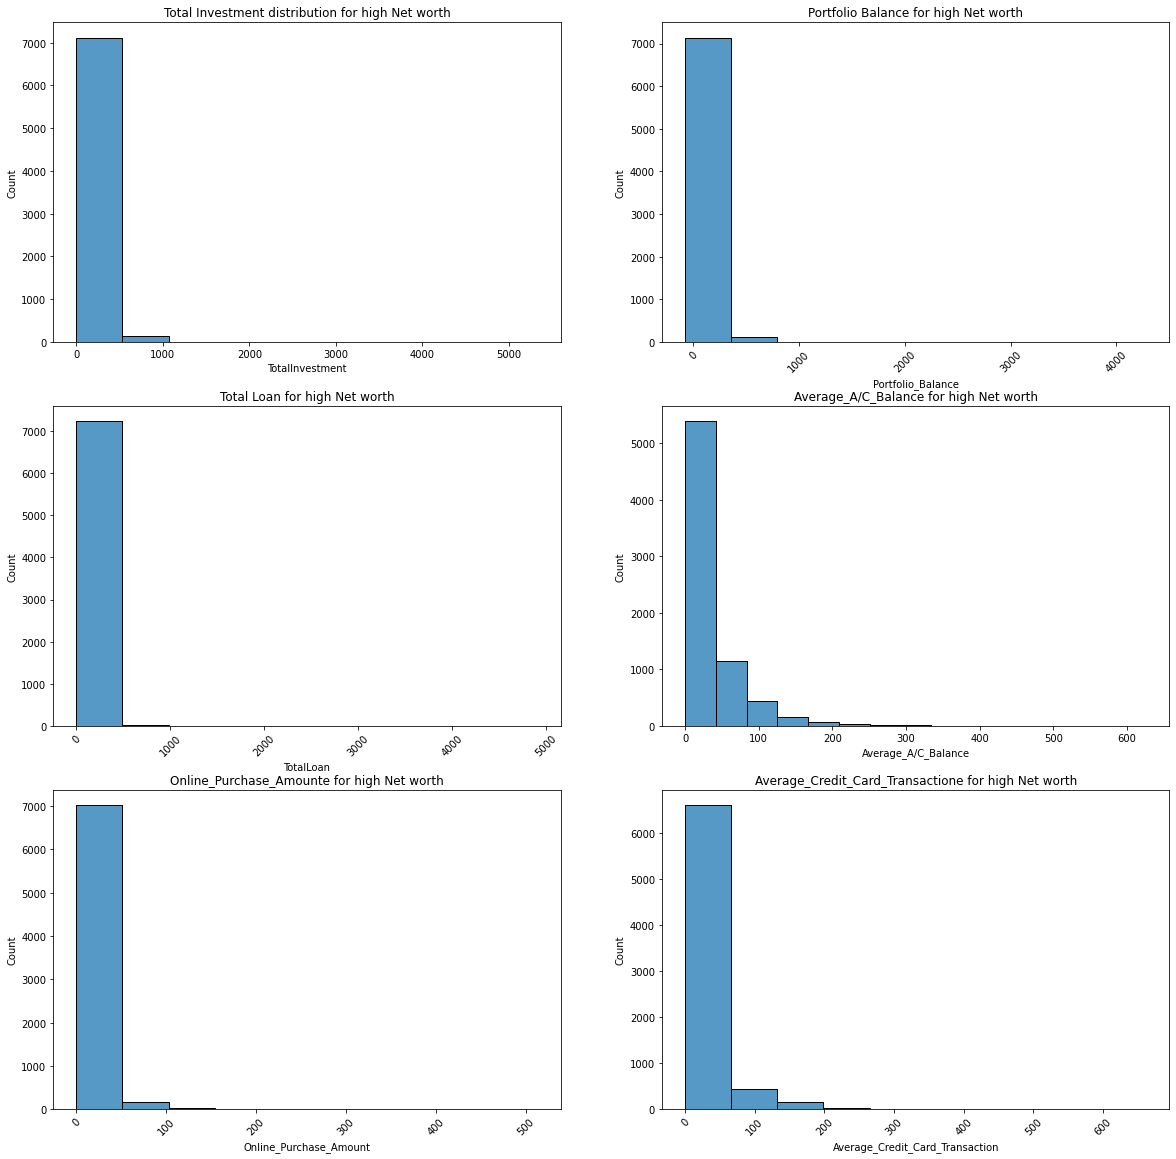

In [16]:
fig=plt.figure(figsize=[20,20])
plt.subplot(3,2,1)
sns.histplot(x="TotalInvestment",bins=10, data=data[data.Revenue_Grid==2])
plt.title("Total Investment distribution for high Net worth")

plt.subplot(3,2,2)
sns.histplot(x="Portfolio_Balance",bins=10, data=data[data.Revenue_Grid==2])
plt.title("Portfolio Balance for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,3)
sns.histplot(x="TotalLoan",bins=10, data=data[data.Revenue_Grid==2])
plt.title("Total Loan for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,4)
sns.histplot(x="Average_A/C_Balance",bins=15, data=data[data.Revenue_Grid==2])
plt.title("Average_A/C_Balance for high Net worth")

plt.subplot(3,2,5)
sns.histplot(x="Online_Purchase_Amount",bins=10, data=data[data.Revenue_Grid==2])
plt.title("Online_Purchase_Amounte for high Net worth")
plt.xticks(rotation=45)

plt.subplot(3,2,6)
sns.histplot(x="Average_Credit_Card_Transaction",bins=10, data=data[data.Revenue_Grid==2])
plt.title("Average_Credit_Card_Transactione for high Net worth")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Avg Investment Gender Wise')

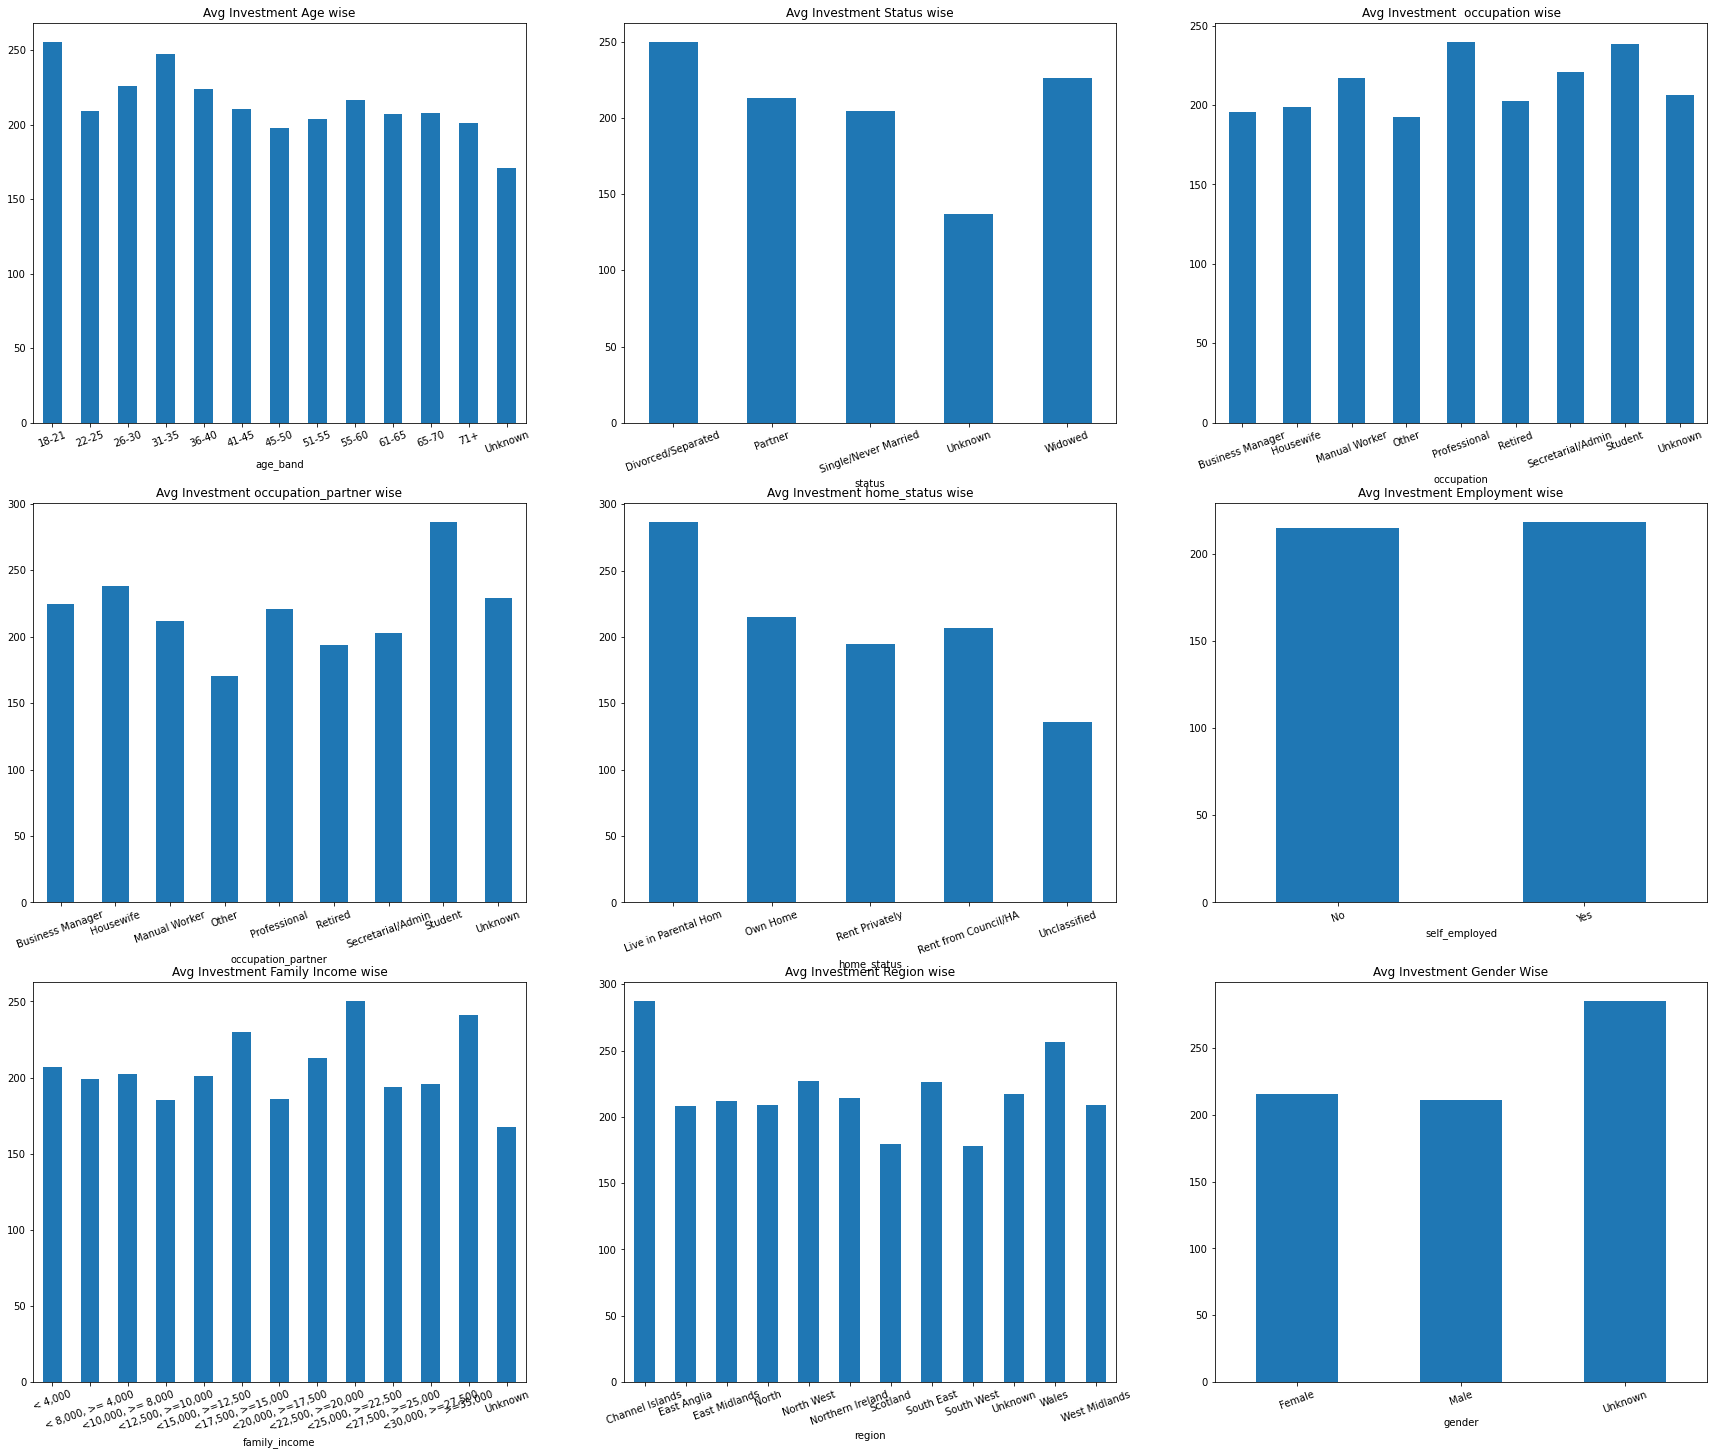

In [17]:
fig=plt.figure(figsize=[30,25])

plt.subplot(3,3,1)
data[data.Revenue_Grid==1].groupby("age_band")["TotalInvestment"].mean().plot.bar()
plt.title("Avg Investment Age wise")
plt.xticks(rotation=20)

plt.subplot(3,3,2)
data[data.Revenue_Grid==1].groupby("status")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Status wise")

plt.subplot(3,3,3)
data[data.Revenue_Grid==1].groupby("occupation")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment  occupation wise")

plt.subplot(3,3,4)
data[data.Revenue_Grid==1].groupby("occupation_partner")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment occupation_partner wise")

plt.subplot(3,3,5)
data[data.Revenue_Grid==1].groupby("home_status")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment home_status wise")

plt.subplot(3,3,6)
data[data.Revenue_Grid==1].groupby("self_employed")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Employment wise")

plt.subplot(3,3,7)
data[data.Revenue_Grid==1].groupby("family_income")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Family Income wise")

plt.subplot(3,3,8)
data[data.Revenue_Grid==1].groupby("region")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Region wise")

plt.subplot(3,3,9)
data[data.Revenue_Grid==1].groupby("gender")["TotalInvestment"].mean().plot.bar()
plt.xticks(rotation=20)
plt.title("Avg Investment Gender Wise")

## **Data Cleaning**

In [18]:
data.age_band=data.age_band.replace("Unknown",data.age_band.mode()[0])
data.status=data.status.replace("Unknown",data.status.mode()[0])
data.occupation=data.occupation.replace("Unknown",data.occupation.mode()[0])
data.occupation_partner=data.occupation_partner.replace("Unknown",data.status.mode()[0])
data.family_income=data.family_income.replace("Unknown",data.family_income.mode()[0])
data.TVarea=data.TVarea.replace("Unknown",data.TVarea.mode()[0])
data.gender=data.gender.replace("Unknown",data.gender.mode()[0])
data.region=data.region.replace("Unknown",data.region.mode()[0])
data.children=data.children.replace("Zero",'0')

dataTest.age_band=dataTest.age_band.replace("Unknown",dataTest.age_band.mode()[0])
dataTest.status=dataTest.status.replace("Unknown",dataTest.status.mode()[0])
dataTest.occupation=dataTest.occupation.replace("Unknown",dataTest.occupation.mode()[0])
dataTest.occupation_partner=dataTest.occupation_partner.replace("Unknown",dataTest.status.mode()[0])
dataTest.family_income=dataTest.family_income.replace("Unknown",dataTest.family_income.mode()[0])
dataTest.TVarea=dataTest.TVarea.replace("Unknown",dataTest.TVarea.mode()[0])
dataTest.gender=dataTest.gender.replace("Unknown",dataTest.gender.mode()[0])
dataTest.region=dataTest.region.replace("Unknown",dataTest.region.mode()[0])
dataTest.children=dataTest.children.replace("Zero",'0')



In [19]:
dataTrainCopy=data.drop(["REF_NO","year_last_moved","TVarea","post_code","post_area","region","gender","Term_Deposit","Investment_in_Mutual_Fund","Investment_Tax_Saving_Bond","Investment_in_Commudity","Investment_in_Equity","Investment_in_Derivative"], axis=1)
data.head(5)
dataTestCopy=dataTest.drop(["REF_NO","year_last_moved","TVarea","post_code","post_area","region","gender","Term_Deposit","Investment_in_Mutual_Fund","Investment_Tax_Saving_Bond","Investment_in_Commudity","Investment_in_Equity","Investment_in_Derivative"], axis=1)


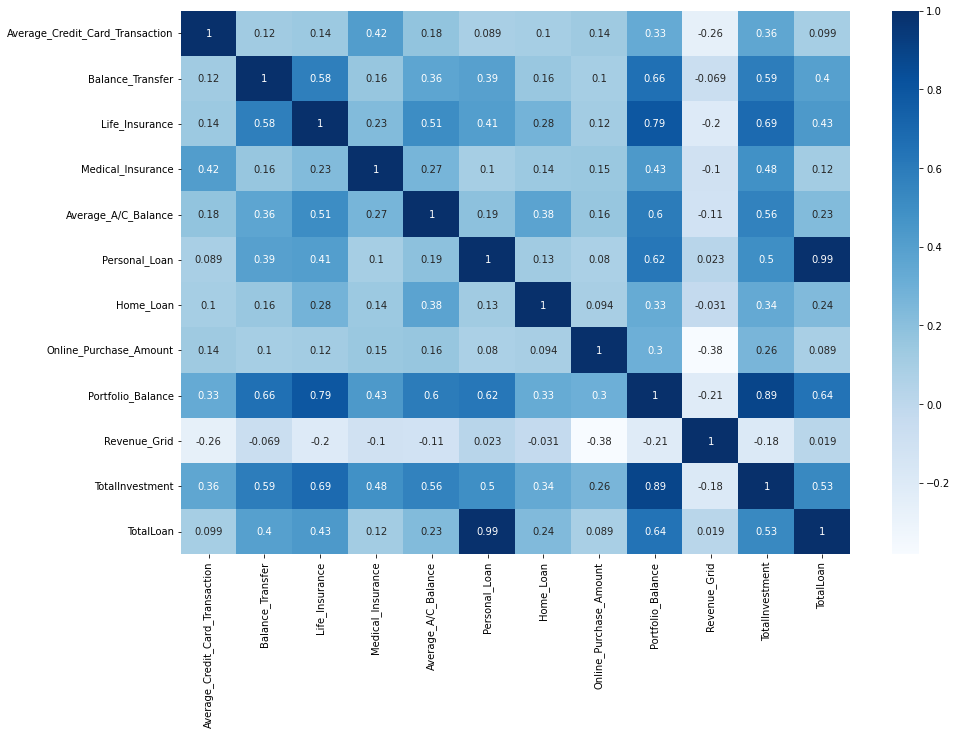

In [20]:
figure=plt.figure(figsize=[15,10])
sns.heatmap(dataTrainCopy.corr(), cmap="Blues", annot=True,linecolor="white")


## **Check Data Imbalance**

In [21]:
dataTrainCopy.Revenue_Grid.value_counts()

2    7264
1     860
Name: Revenue_Grid, dtype: int64

## **DataEncoding**

In [22]:
dataTrainCopyEncoded = pd.get_dummies(dataTrainCopy)
# one_hot_encoded_data_train.head(5)

dataTestCopyEncoded = pd.get_dummies(dataTestCopy)
# one_hot_encoded_data_test.head(5)
# one_hot_encoded_data_test.info()

## **Train Test Split**

In [23]:
X=dataTrainCopyEncoded.drop("Revenue_Grid",axis=1)
y=dataTrainCopyEncoded.Revenue_Grid

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=.35,random_state=35)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(5280, 70)
(5280,)
(2844, 70)
(2844,)


## **Scaling**

In [24]:
myScaler=RobustScaler()
X_train_scale=pd.DataFrame(myScaler.fit_transform(X_train), columns=X_train.columns)
X_test_scale=pd.DataFrame(myScaler.transform(X_test),columns=X_train.columns)
dataTestCopyEncoded_scale=pd.DataFrame(myScaler.transform(dataTestCopyEncoded),columns=X_train.columns)
dataTestCopyEncoded_scale.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 70 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Average_Credit_Card_Transaction       2031 non-null   float64
 1   Balance_Transfer                      2031 non-null   float64
 2   Life_Insurance                        2031 non-null   float64
 3   Medical_Insurance                     2031 non-null   float64
 4   Average_A/C_Balance                   2031 non-null   float64
 5   Personal_Loan                         2031 non-null   float64
 6   Home_Loan                             2031 non-null   float64
 7   Online_Purchase_Amount                2031 non-null   float64
 8   Portfolio_Balance                     2031 non-null   float64
 9   TotalInvestment                       2031 non-null   float64
 10  TotalLoan                             2031 non-null   float64
 11  children_0       

### **Build Model using Logical Regression**

In [25]:
model=LogisticRegression()
model.fit(X_train_scale,y_train)
y_pred_train=model.predict(X_train_scale)
y_pred_test=model.predict(X_test_scale)
print("Accuracy Score for Training Data for Model", model, "is ", accuracy_score(y_train,y_pred_train))
print("Accuracy Score for Testing Data for Model", model , "is ", accuracy_score(y_test,y_pred_test))
print("Confusion Matrix for train data for model",model, "is\n",confusion_matrix(y_train, y_pred_train))
print("Confusion Matrix for Test data for Model", model , "is \n ", confusion_matrix(y_test, y_pred_test))

train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

# from sklearn.model_selection import cross_val_score
# # Evaluate the model
# scores = cross_val_score(model, X_train_scale, y_train, cv=5, scoring='f1', n_jobs=-1)
# # Report the mean performance
# print('f1: %.3f' % scores.mean())

Accuracy Score for Training Data for Model LogisticRegression() is  0.9416666666666667
Accuracy Score for Testing Data for Model LogisticRegression() is  0.9472573839662447
Confusion Matrix for train data for model LogisticRegression() is
 [[ 337  254]
 [  54 4635]]
Confusion Matrix for Test data for Model LogisticRegression() is 
  [[ 143  126]
 [  24 2551]]
                    Training Report          
              precision    recall  f1-score   support

           1       0.86      0.57      0.69       591
           2       0.95      0.99      0.97      4689

    accuracy                           0.94      5280
   macro avg       0.90      0.78      0.83      5280
weighted avg       0.94      0.94      0.94      5280

                    Testing Report           
              precision    recall  f1-score   support

           1       0.86      0.53      0.66       269
           2       0.95      0.99      0.97      2575

    accuracy                           0.95      2844
 

### **Applying SMOTE**

In [26]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 20)

X_train_sm, y_train_sm = sm.fit_resample(X_train_scale, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_scale.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_sm == 2)))

model=LogisticRegression()
model.fit(X_train_sm,y_train_sm)
y_pred_train=model.predict(X_train_sm)
y_pred_test=model.predict(X_test_scale)
print("Accuracy Score for Training Data for Model", model, "is ", accuracy_score(y_train_sm,y_pred_train))
print("Accuracy Score for Testing Data for Model", model , "is ", accuracy_score(y_test,y_pred_test))
print("Confusion Matrix for train data for model",model, "is\n",confusion_matrix(y_train_sm, y_pred_train))
print("Confusion Matrix for Test data for Model", model , "is \n ", confusion_matrix(y_test, y_pred_test))

train_report = classification_report(y_train_sm, y_pred_train)
test_report = classification_report(y_test, y_pred_test)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)




Before OverSampling, counts of label '1': 591
Before OverSampling, counts of label '2': 4689 

After OverSampling, the shape of train_X: (5280, 70)
After OverSampling, the shape of train_y: (5280,) 

After OverSampling, counts of label '1': 4689
After OverSampling, counts of label '2': 4689
Accuracy Score for Training Data for Model LogisticRegression() is  0.8597782043079548
Accuracy Score for Testing Data for Model LogisticRegression() is  0.8931082981715893
Confusion Matrix for train data for model LogisticRegression() is
 [[3855  834]
 [ 481 4208]]
Confusion Matrix for Test data for Model LogisticRegression() is 
  [[ 207   62]
 [ 242 2333]]
                    Training Report          
              precision    recall  f1-score   support

           1       0.89      0.82      0.85      4689
           2       0.83      0.90      0.86      4689

    accuracy                           0.86      9378
   macro avg       0.86      0.86      0.86      9378
weighted avg       0.86     

## **Predict Output using Test File**

In [ ]:
dataTestCopyEncoded_scale_output=model.predict(dataTestCopyEncoded_scale)
dataTestCopyEncoded_scale.insert(0,"REF",dataTest.REF_NO)
dataTestCopyEncoded_scale.insert(0,"Output",dataTestCopyEncoded_scale_output)

dataTestCopyEncoded_scale.to_csv("/content/drive/MyDrive/TermProjects/CustomerClassification/submissionCopy.csv", index=False, header=False)
